# Predicting Engine Rating

# 1. Business Problem 

we have to predict engine rating given current condition of that body part at the time of inspection of car

# 2.Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

<h3> 2.1 Loading data </h3>

In [2]:
df = pd.read_excel('data.xlsx', sheet_name='data')

# print whole sheet data
print(df)


      appointmentId inspectionStartTime  year  month  \
0             aj_01 2019-02-03 15:43:48  2008      8   
1             aj_02 2019-01-16 13:02:12  2007      5   
2             aj_03 2019-02-09 13:31:04  2012      5   
3             aj_04 2019-01-18 11:02:53  2013      1   
4             aj_05 2019-01-27 12:12:06  2011      7   
5             aj_06 2019-01-31 11:53:01  2011     11   
6             aj_07 2019-04-04 17:00:12  2012      3   
7             aj_08 2019-04-08 12:47:09  2016      2   
8             aj_09 2019-01-05 16:09:37  2007      4   
9             aj_10 2019-01-06 13:38:10  2011      2   
10            aj_11 2019-01-02 15:48:54  2011      6   
11            aj_12 2019-02-03 17:41:55  2011      3   
12            aj_13 2019-02-28 12:44:38  2013      6   
13            aj_14 2019-02-26 14:51:06  2012     11   
14            aj_15 2019-02-25 16:46:28  2010     12   
15            aj_16 2019-02-07 11:10:56  2016      4   
16            aj_17 2019-02-17 14:38:43  2004   

In [3]:
print("Number of data points:",df.shape[0])

Number of data points: 26307


In [4]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


# 3. Data Preparation and Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
appointmentId                                                26307 non-null object
inspectionStartTime                                          26307 non-null datetime64[ns]
year                                                         26307 non-null int64
month                                                        26307 non-null int64
engineTransmission_battery_value                             26307 non-null object
engineTransmission_battery_cc_value_0                        3438 non-null object
engineTransmission_battery_cc_value_1                        430 non-null object
engineTransmission_battery_cc_value_2                        72 non-null object
engineTransmission_battery_cc_value_3                        16 non-null object
engineTransmission_battery_cc_value_4                        4 non-null object
engineTransmission_engineoilLevelDipstick_value              26307 n

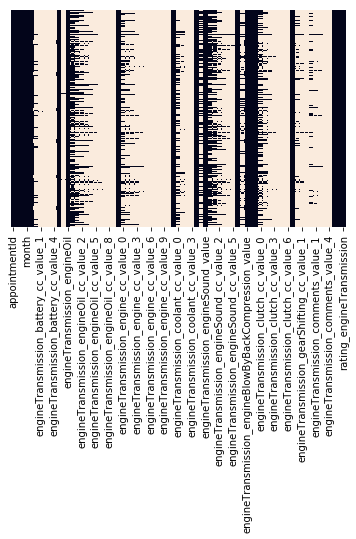

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

By heatmap we get to know that our dataset has a lot of missing values. So we drop those columns/ features with more than 50% missing values

In [7]:
half_count = len(df) / 2

In [8]:
df = df.dropna(thresh=half_count,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 22 columns):
appointmentId                                                26307 non-null object
inspectionStartTime                                          26307 non-null datetime64[ns]
year                                                         26307 non-null int64
month                                                        26307 non-null int64
engineTransmission_battery_value                             26307 non-null object
engineTransmission_engineoilLevelDipstick_value              26307 non-null object
engineTransmission_engineOil                                 26307 non-null object
engineTransmission_engineOil_cc_value_0                      18557 non-null object
engineTransmission_engine_value                              26307 non-null object
engineTransmission_coolant_value                             26307 non-null object
engineTransmission_engineMounting_value                

<h3> Filling missing data</h3>

We have 3 features/columns still left with missing data with one approx 50% missing data. So we will drop one feature with approx 50% missing data and fill rest 2 columns data

In [9]:
df['engineTransmission_engineOil_cc_value_0']=df['engineTransmission_engineOil_cc_value_0'].fillna(df['engineTransmission_engineOil_cc_value_0'].mode()[0])

In [10]:
df['engineTransmission_engineOil_cc_value_0'].head(10)

0      Leaking
1      Leaking
2        Dirty
3        Dirty
4      Leaking
5      Leaking
6        Dirty
7      Leaking
8    Level Low
9        Dirty
Name: engineTransmission_engineOil_cc_value_0, dtype: object

In [11]:
df['engineTransmission_engineSound_cc_value_0']=df['engineTransmission_engineSound_cc_value_0'].fillna(df['engineTransmission_engineSound_cc_value_0'].mode()[0])
df['engineTransmission_engineSound_cc_value_1']=df['engineTransmission_engineSound_cc_value_1'].fillna(df['engineTransmission_engineSound_cc_value_1'].mode()[0])

In [12]:
df['engineTransmission_engineSound_cc_value_0'].head(10)


0    Alternator Brg Noise
1            Timing Noise
2    Alternator Brg Noise
3            Timing Noise
4            Timing Noise
5            Tappet Noise
6            Timing Noise
7            Timing Noise
8    Alternator Brg Noise
9            Timing Noise
Name: engineTransmission_engineSound_cc_value_0, dtype: object

In [13]:
df.drop(['engineTransmission_engineSound_cc_value_1'],axis=1,inplace=True)

In [14]:
df.shape

(26307, 21)

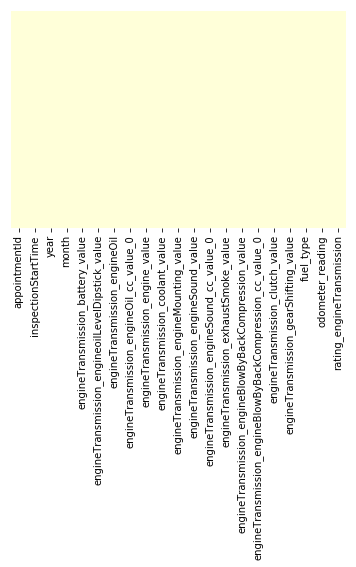

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [16]:
df.shape

(26307, 21)

In [17]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engine_value,engineTransmission_coolant_value,...,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Yes,No,Leaking,No,No,...,No,Alternator Brg Noise,No,No,Back Compression Exist,No,Yes,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,Yes,No,Leaking,No,No,...,No,Timing Noise,No,Yes,NO Blow-by,Yes,Yes,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,Yes,No,Dirty,Yes,No,...,No,Alternator Brg Noise,No,Yes,Perm. Blow By on idle,No,Yes,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,Yes,No,Dirty,Yes,No,...,Yes,Timing Noise,Yes,Yes,NO Blow-by,No,Yes,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,Yes,No,Leaking,No,Yes,...,No,Timing Noise,No,Yes,NO Blow-by,No,Yes,Petrol + CNG,74368,4.0


<h3>Distribution of ratings</h3>

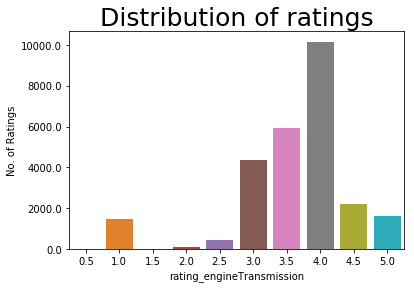

In [18]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings', fontsize=25)
sns.countplot(df.rating_engineTransmission)
ax.set_yticklabels([item for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings')

plt.show()

So we get to know that our data is imbalanced dataset. So we can't use Accuracy as performance metric.

In [19]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engine_value,engineTransmission_coolant_value,...,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Yes,No,Leaking,No,No,...,No,Alternator Brg Noise,No,No,Back Compression Exist,No,Yes,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,Yes,No,Leaking,No,No,...,No,Timing Noise,No,Yes,NO Blow-by,Yes,Yes,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,Yes,No,Dirty,Yes,No,...,No,Alternator Brg Noise,No,Yes,Perm. Blow By on idle,No,Yes,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,Yes,No,Dirty,Yes,No,...,Yes,Timing Noise,Yes,Yes,NO Blow-by,No,Yes,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,Yes,No,Leaking,No,Yes,...,No,Timing Noise,No,Yes,NO Blow-by,No,Yes,Petrol + CNG,74368,4.0


# Handle categorical data

In [20]:
columns=['engineTransmission_battery_value','engineTransmission_engineoilLevelDipstick_value','engineTransmission_engineOil','engineTransmission_engineOil_cc_value_0','engineTransmission_engine_value','engineTransmission_coolant_value','engineTransmission_engineMounting_value','engineTransmission_engineSound_value','engineTransmission_engineSound_cc_value_0','engineTransmission_exhaustSmoke_value','engineTransmission_engineBlowByBackCompression_value','engineTransmission_engineBlowByBackCompression_cc_value_0','engineTransmission_clutch_value','engineTransmission_gearShifting_value','fuel_type']

In [21]:
len(columns)

15

In [22]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [23]:
final_df=df

In [24]:
final_df['rating_engineTransmission'].head()

0    3.0
1    4.0
2    3.5
3    3.5
4    4.0
Name: rating_engineTransmission, dtype: float64

In [25]:
final_df = category_onehot_multcols(columns)

engineTransmission_battery_value
engineTransmission_engineoilLevelDipstick_value
engineTransmission_engineOil
engineTransmission_engineOil_cc_value_0
engineTransmission_engine_value
engineTransmission_coolant_value
engineTransmission_engineMounting_value
engineTransmission_engineSound_value
engineTransmission_engineSound_cc_value_0
engineTransmission_exhaustSmoke_value
engineTransmission_engineBlowByBackCompression_value
engineTransmission_engineBlowByBackCompression_cc_value_0
engineTransmission_clutch_value
engineTransmission_gearShifting_value
fuel_type


In [26]:
final_df.shape

(26307, 40)

<h3>Duplicate data should be removed</h3>

In [27]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [28]:
final_df.shape

(26307, 30)

In [53]:
final_df=final_df.drop(['appointmentId'],axis=1)

In [54]:
final_df.head()

,inspectionStartTime,year,month,odometer_reading,rating_engineTransmission,Yes,Leakage from Side cover,Leakage from Sump/chamber,Leakage from Tappet Cover,Leakage from Turbo Charger,...,Whistling Noise-Turbo,NO Blow-by,Oil spillage on Idle,Perm. Blow By on idle,Perm. blow by & oil spillage on idle,Electric,Hybrid,Petrol,Petrol + CNG,Petrol + LPG
0,2019-02-03 15:43:48,2008,8,124600,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-01-16 13:02:12,2007,5,78108,4.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2019-02-09 13:31:04,2012,5,93348,3.5,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2019-01-18 11:02:53,2013,1,48233,3.5,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2019-01-27 12:12:06,2011,7,74368,4.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Train and Test Construction 
We build train and test by randomly splitting in the ratio of 70:30 (or 80:20 whatever we choose) as we have sufficient points to work with.

In [55]:
X=final_df.drop(['rating_engineTransmission'], axis=1)
X=final_df.drop(['inspectionStartTime'], axis=1)
X.head()

,year,month,odometer_reading,rating_engineTransmission,Yes,Leakage from Side cover,Leakage from Sump/chamber,Leakage from Tappet Cover,Leakage from Turbo Charger,Leaking,...,Whistling Noise-Turbo,NO Blow-by,Oil spillage on Idle,Perm. Blow By on idle,Perm. blow by & oil spillage on idle,Electric,Hybrid,Petrol,Petrol + CNG,Petrol + LPG
0,2008,8,124600,3.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2007,5,78108,4.0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,2012,5,93348,3.5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2013,1,48233,3.5,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2011,7,74368,4.0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [56]:
Y=final_df.rating_engineTransmission
Y.head()

0    3.0
1    4.0
2    3.5
3    3.5
4    4.0
Name: rating_engineTransmission, dtype: float64

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [58]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (18414, 28)
Number of data points in test data : (7893, 28)


In [59]:
print("Number of data points in train data :",Y_train.shape)
print("Number of data points in test data :",Y_test.shape)
Y_train.head()

Number of data points in train data : (18414,)
Number of data points in test data : (7893,)


13995    4.0
261      3.5
14459    4.0
4192     4.0
4548     3.5
Name: rating_engineTransmission, dtype: float64

#  Random Forest Classifier with GridSearch

In [60]:
import xgboost
classifier=xgboost.XGBRegressor()

In [61]:
import xgboost
regressor=xgboost.XGBRegressor()

In [62]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,]

In [63]:
## Hyper Parameter Optimization


n_estimators = [100, 500]
max_depth = [2,5, 10]
booster=['gbtree','gblinear']
learning_rate=[0.1,0.15]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [64]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [65]:
random_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   56.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  3.3min finished


[21:31:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500], 'max_depth': [2, 5, 10], 'learning_rate': [0.1, 0.15], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [67]:
random_cv.estimator

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [68]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [69]:
regressor.fit(X_train,Y_train)

[21:34:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [70]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [73]:
X_test.shape

(7893, 28)

In [74]:
X_test.head()

,year,month,odometer_reading,rating_engineTransmission,Yes,Leakage from Side cover,Leakage from Sump/chamber,Leakage from Tappet Cover,Leakage from Turbo Charger,Leaking,...,Whistling Noise-Turbo,NO Blow-by,Oil spillage on Idle,Perm. Blow By on idle,Perm. blow by & oil spillage on idle,Electric,Hybrid,Petrol,Petrol + CNG,Petrol + LPG
3739,2017,10,47131,5.0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
23531,2005,7,176533,3.0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
13838,2013,6,48433,3.5,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
10108,2014,3,45784,3.0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7125,2006,7,156814,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
X_test.drop(['rating_engineTransmission'],axis=1).head()

,year,month,odometer_reading,Yes,Leakage from Side cover,Leakage from Sump/chamber,Leakage from Tappet Cover,Leakage from Turbo Charger,Leaking,Level Low,...,Whistling Noise-Turbo,NO Blow-by,Oil spillage on Idle,Perm. Blow By on idle,Perm. blow by & oil spillage on idle,Electric,Hybrid,Petrol,Petrol + CNG,Petrol + LPG
3739,2017,10,47131,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
23531,2005,7,176533,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
13838,2013,6,48433,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
10108,2014,3,45784,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
7125,2006,7,156814,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [80]:
y_pred=regressor.predict(X_test)

In [81]:
y_pred

array([4.999864 , 2.999935 , 3.4999204, ..., 3.999907 , 3.999907 ,
       4.999864 ], dtype=float32)